In [1]:
# Plot cloud sizes (using plotting_utility function)
# import sys
# sys.path.append('..')  # Adds the parent directory to the path
# from utils.plotting_utils import plot_cloud_sizes
# plot_cloud_sizes(cloud_data)

In [20]:
import matplotlib.pyplot as plt
from netCDF4 import Dataset

# import cloud data
cloud_data = '../cloud_data.nc'

# print all variables
with Dataset(cloud_data, 'r') as dataset:
    for var in dataset.variables:
        print(f"{var}: shape = {dataset.variables[var].shape}")

size: shape = (9, 4)
x_center: shape = (9, 4)
y_center: shape = (9, 4)
z_center: shape = (9, 4)
x: shape = (9, 4, 2918)
y: shape = (9, 4, 2918)
z: shape = (9, 4, 2918)


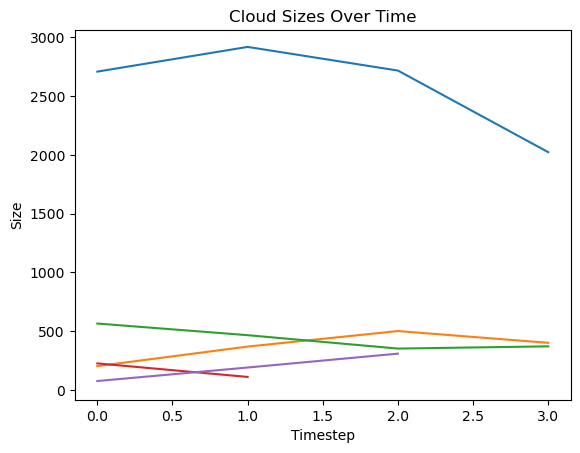

In [21]:
with Dataset(cloud_data, 'r') as dataset:
    sizes = dataset.variables['size'][:]

    for i in range(sizes.shape[0]):  # Iterate over clouds
        cloud_sizes = sizes[i, :]
        timesteps = range(len(cloud_sizes))
        plt.plot(timesteps, cloud_sizes, label=f'Cloud {i+1}')

    plt.xlabel('Timestep')
    plt.ylabel('Size')
    plt.title('Cloud Sizes Over Time')
    plt.show()


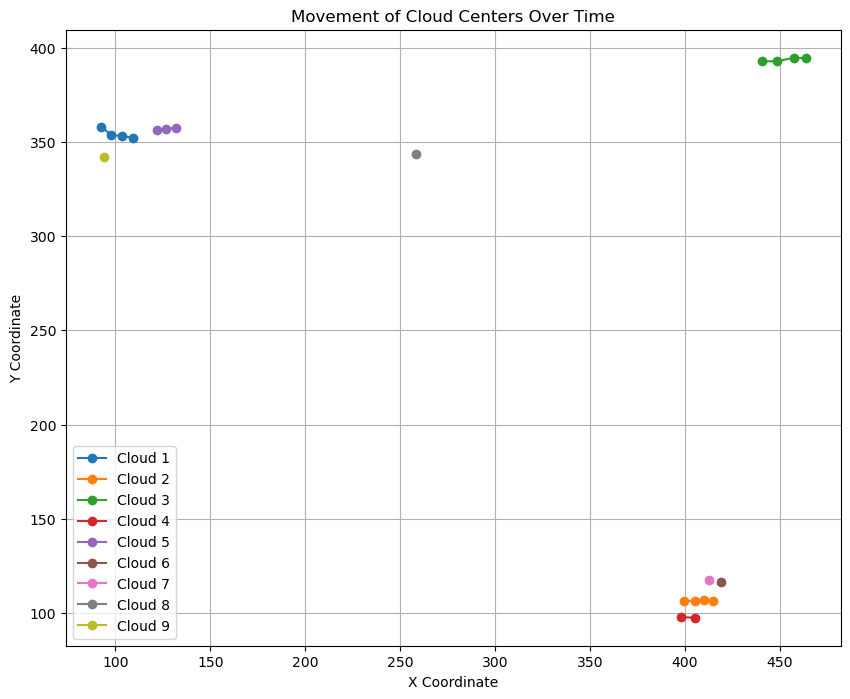

In [22]:
def plot_cloud_movements(filename):
    with Dataset(filename, 'r') as dataset:
        x_centers = dataset.variables['x_center'][:]
        y_centers = dataset.variables['y_center'][:]
        z_centers = dataset.variables['z_center'][:]

        num_clouds = x_centers.shape[0]
        num_timesteps = x_centers.shape[1]

        plt.figure(figsize=(10, 8))
        for i in range(num_clouds):
            # Extract the trajectory for each cloud
            x_traj = x_centers[i, :]
            y_traj = y_centers[i, :]
            z_traj = z_centers[i, :]

            # Plot the trajectory
            plt.plot(x_traj, y_traj, marker='o', label=f'Cloud {i+1}')

        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title('Movement of Cloud Centers Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()

# plot
plot_cloud_movements('../cloud_data.nc')